In [1]:
# Downloading the dataset
!kaggle datasets download -d rjmanoj/credit-card-customer-churn-prediction -p "/Users/vishnumr/My Files/Programs/Python/Deep Learning 100/data"


Dataset URL: https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction
License(s): unknown
100%|█████████████████████████████████████████| 262k/262k [00:00<00:00, 270kB/s]
100%|█████████████████████████████████████████| 262k/262k [00:00<00:00, 270kB/s]


In [2]:
# Unziping the files
import os
import zipfile

data_folder = "/Users/vishnumr/My Files/Programs/Python/Deep Learning 100/data"

# print("Folders:", os.listdir(data_folder))
for folder_name in os.listdir(data_folder):
    if folder_name.endswith(".zip"):
        zip_path = os.path.join(data_folder, folder_name)

        try:
            print(f"Extracting the zip file...: {zip_path}")
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(data_folder)
            
            os.remove(zip_path)
            print(f"Unzip Succesful and zip file {zip_path} is deteted!!!")
        except zipfile.BadZipFile:
            print(f"Zip file {zip_path} is curropted")
        except Exception as e:
            print(f"Error occured while porcessing {folder_name}\n Error:{e}")
else:
    print("No Zip files found!!!")

Extracting the zip file...: /Users/vishnumr/My Files/Programs/Python/Deep Learning 100/data/credit-card-customer-churn-prediction.zip
Unzip Succesful and zip file /Users/vishnumr/My Files/Programs/Python/Deep Learning 100/data/credit-card-customer-churn-prediction.zip is deteted!!!
No Zip files found!!!


In [3]:
# Importing data
import pandas as pd
import numpy as np
df = pd.read_csv('data/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df.drop(columns=['RowNumber','CustomerId', 'Surname'], inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [15]:
# Splitting the data into train and test split
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [16]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [17]:
y_train.shape, y_test.shape

((8000,), (2000,))

In [18]:
# Scalling the data to generalizing the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scalar = scaler.transform(X_test)

In [19]:
X_train_scaler

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

# Creating a neural network with 3 layers
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Users/vishnumr/My Files/Programs/Python/Deep Learning 100/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compling the model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [24]:
history = model.fit(X_train_scaler, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6596 - loss: 0.6171 - val_accuracy: 0.7994 - val_loss: 0.4640
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.8041 - loss: 0.4579 - val_accuracy: 0.8062 - val_loss: 0.4407
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.8129 - loss: 0.4354 - val_accuracy: 0.8138 - val_loss: 0.4294
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.8103 - loss: 0.4336 - val_accuracy: 0.8181 - val_loss: 0.4204
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.8143 - loss: 0.4196 - val_accuracy: 0.8244 - val_loss: 0.4127
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.8264 - loss: 0.4133 - val_accuracy: 0.8288 - val_loss: 0.4024
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.8361 - loss: 0.4020 - val_accuracy: 0.8338 - val_loss: 0.3926
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.8358 - loss: 0.3

In [25]:
model.layers[0].get_weights(),model.layers[1].get_weights()

([array([[ 2.25057289e-01,  2.72133917e-01, -2.77283937e-01,
          -3.23166102e-01,  2.39514597e-02,  3.11733522e-02,
           6.31007403e-02, -5.27922474e-02, -9.00676996e-02,
           3.42434287e-01,  4.41685803e-02],
         [ 3.72797288e-02, -1.27998888e-02,  8.11169565e-01,
           6.72303289e-02, -3.57166380e-01, -5.24816632e-01,
          -1.24322399e-01,  1.41450286e+00, -3.91219854e-01,
           3.95870894e-01,  6.21804446e-02],
         [ 4.71871018e-01,  6.38622761e-01,  3.27952355e-01,
          -1.47828043e-01,  1.67063907e-01, -2.31602177e-01,
          -2.05934852e-01, -8.29609632e-02,  1.10481605e-01,
           5.01797907e-02,  2.37583265e-01],
         [-3.54643792e-01, -3.86735797e-01,  9.78767574e-02,
          -3.89488012e-01,  2.66225010e-01,  1.15435529e+00,
           2.94844002e-01, -7.15086889e-03, -1.58439487e-01,
           8.89905572e-01,  5.42779565e-01],
         [-7.85600901e-01,  3.08853909e-02,  1.43577039e-01,
          -1.07152557e+00, 

In [26]:
y_log = model.predict(X_test_scalar)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step


In [27]:
y_pred = np.where(y_log>0.5,1,0)

In [28]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8615

In [30]:
import matplotlib.pyplot as plt

In [31]:
history

In [32]:
history.history

{'accuracy': [0.7503125071525574,
  0.8040624856948853,
  0.8092187643051147,
  0.8165624737739563,
  0.8209375143051147,
  0.828125,
  0.835156261920929,
  0.840624988079071,
  0.8482812643051147,
  0.8509374856948853,
  0.85546875,
  0.8581249713897705,
  0.8589062690734863,
  0.8595312237739563,
  0.8598437309265137,
  0.8618749976158142,
  0.8606250286102295,
  0.8615624904632568,
  0.8628125190734863,
  0.8623437285423279,
  0.8628125190734863,
  0.8628125190734863,
  0.8623437285423279,
  0.8621875047683716,
  0.8631250262260437,
  0.8637499809265137,
  0.8646875023841858,
  0.8634374737739563,
  0.8639062643051147,
  0.8635937571525574,
  0.86328125,
  0.8618749976158142,
  0.862500011920929,
  0.864062488079071,
  0.8607812523841858,
  0.8656250238418579,
  0.864062488079071,
  0.8635937571525574,
  0.8646875023841858,
  0.8631250262260437,
  0.8648437261581421,
  0.86328125,
  0.8637499809265137,
  0.8650000095367432,
  0.8635937571525574,
  0.8642187714576721,
  0.86390626430

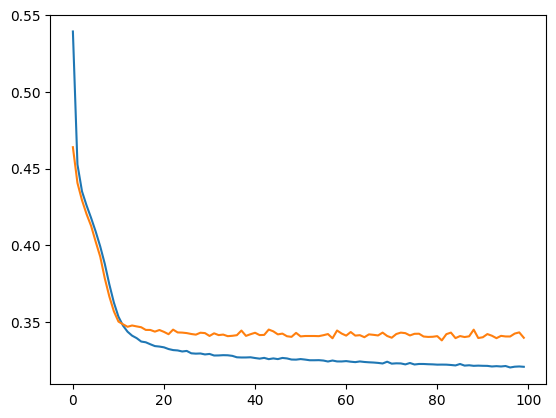

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

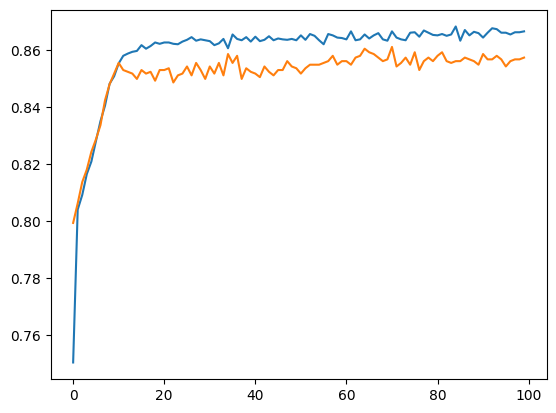

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])